Collect and Clean twitter data.
Topic: Impact of political campaign, in kenya, to the country's economy.
Big Q: What is the sentiments around the political campaign and the economy currenlt in kenya.
With the current increase in food prices, most citizens are complainiing an throwing blames to the current government. I am interested to know the sentiments around this topic.


### Importing required and essential libraries.

In [1]:
import tweepy as tw
import pandas as pd
import csv
import re
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

from wordcloud import WordCloud
import nltk 
from nltk.tokenize.toktok import ToktokTokenizer
tokenizer = ToktokTokenizer()
from nltk.corpus import stopwords
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

### Getting and authenticating. my twitter keys 

In [2]:

# your Twitter API key and API secret
my_api_key = "e8i7kaUtmZtGvMOPH0k9xKq7a"
my_api_secret = "8abPokd8k1MGjMgkLXLswm4Zu5g0PfFl3w7QqBXeVEgeP7up31"
# authenticate
auth = tw.OAuthHandler(my_api_key, my_api_secret)
api = tw.API(auth, wait_on_rate_limit=True)
    

we are now able to build a search query

In [3]:
# Enter your search words in accordance with the basic filtering rules
search_words = "coronavirus OR covid OR pandemic OR covid19 OR lockdown"

# We also want to exclude retweets and replies as this may sway results
my_search = search_words + " -filter:retweets" + " -filter:replies"  

filter tweets based on our chosen language, which is english

In [4]:

# The Twitter data is stored in a Tweet object which we've called tweets
tweets = api.search(q=my_search,lang="en",tweet_mode="extended",count=100)

In [5]:
# Iterate and print tweets
i = 1
for tweet in tweets[0:20]:
    print(str(i) + ') ' + tweet.full_text + '\n')
    i = i + 1 

1) Every politician, journalist, media personality, police officer, “expert”, etc. who was in a position of significant power or influence during 2 years of covid hysteria &amp; mandates will be hunted down &amp; ruined - including this Canadian Facist. We have it all on all of you. #auspol https://t.co/WO4Iy5H128

2) It’s interesting how every time politicians decide we need gun control there is a shooting or several right after.

Like covid these shootings are almost smart shootings. They only happen when it lines up with gun control demands.

3) Toyota Motor Corp today said it did not meet its global production plan in April this year as COVID-19 outbreaks and a shortage of spare parts slowed its recovery from the pandemic. The world's largest automaker by sales produced 692,259 vehicles last month, which is 9.1% less

4) Takeda says drugmakers could cut prices in face of global crises: CEO of Asia’s largest pharma company warns recession risk, Ukraine war and Covid will hit healthc

In [6]:
print(tweets[0])

Status(_api=<tweepy.api.API object at 0x7f025255cb90>, _json={'created_at': 'Mon May 30 08:04:04 +0000 2022', 'id': 1531184655164383232, 'id_str': '1531184655164383232', 'full_text': 'Every politician, journalist, media personality, police officer, “expert”, etc. who was in a position of significant power or influence during 2 years of covid hysteria &amp; mandates will be hunted down &amp; ruined - including this Canadian Facist. We have it all on all of you. #auspol https://t.co/WO4Iy5H128', 'truncated': False, 'display_text_range': [0, 288], 'entities': {'hashtags': [{'text': 'auspol', 'indices': [281, 288]}], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/WO4Iy5H128', 'expanded_url': 'https://twitter.com/mikesusername77/status/1530018121909776385', 'display_url': 'twitter.com/mikesusername7…', 'indices': [289, 312]}]}, 'metadata': {'iso_language_code': 'en', 'result_type': 'recent'}, 'source': '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter 

In [7]:
#Now let us submit a query for 1000 tweets and save some of the metadata related to each tweet
tweets = tw.Cursor(api.search,q=my_search,lang="en",tweet_mode='extended').items(1000)

In [8]:
# Extract the info we need from the tweets object
tweet_info = [[tweet.id_str,tweet.created_at,tweet.user.location,tweet.full_text] for tweet in tweets]

In [9]:
# Put our data into a dataframe 
df = pd.DataFrame(data=tweet_info, columns=['tweet_id_str','date_time','location','tweet_text'])

# Have a quick look at the dataframe
df

,tweet_id_str,date_time,location,tweet_text
0,1531184655164383232,2022-05-30 08:04:04,Sydney,"Every politician, journalist, media personalit..."
1,1531184653243019264,2022-05-30 08:04:04,,It’s interesting how every time politicians de...
2,1531184652223913984,2022-05-30 08:04:03,"Москва, Россия",Toyota Motor Corp today said it did not meet i...
3,1531184651233947648,2022-05-30 08:04:03,Switzerland,Takeda says drugmakers could cut prices in fac...
4,1531184643138932737,2022-05-30 08:04:01,Dhaka,Bangladesh has documented 40 Covid incidences ...
...,...,...,...,...
995,1531177594648989698,2022-05-30 07:36:01,Cape Town/South Africa,While 85% of SA population went through a Covi...
996,1531177587112017920,2022-05-30 07:35:59,"Hyderabad, Telangana.",Govt under the compassionate and sensitive lea...
997,1531177585832513536,2022-05-30 07:35:59,New York,When the pandemic threw Dua Lipa’s plans for h...
998,1531177581373964288,2022-05-30 07:35:57,,first time since pre covid finally getting on ...


In [10]:
for i,tweet in enumerate(df['tweet_text'].head(20)):
    print(i+1, tweet, '\n')

1 Every politician, journalist, media personality, police officer, “expert”, etc. who was in a position of significant power or influence during 2 years of covid hysteria &amp; mandates will be hunted down &amp; ruined - including this Canadian Facist. We have it all on all of you. #auspol https://t.co/WO4Iy5H128 

2 It’s interesting how every time politicians decide we need gun control there is a shooting or several right after.

Like covid these shootings are almost smart shootings. They only happen when it lines up with gun control demands. 

3 Toyota Motor Corp today said it did not meet its global production plan in April this year as COVID-19 outbreaks and a shortage of spare parts slowed its recovery from the pandemic. The world's largest automaker by sales produced 692,259 vehicles last month, which is 9.1% less 

4 Takeda says drugmakers could cut prices in face of global crises: CEO of Asia’s largest pharma company warns recession risk, Ukraine war and Covid will hit healthca

### DATA CLEANING AND PRE-PROCESSING
Before we start to analyse our data, we need to perform some cleaning and preprocessing of the text in order to get meaningful results from NLP techniques. The function below will clean the data by removing hyperlinks, special characters, emojis and @mentions from the tweets. This is achieved by using the Regular Expressions module re to serach for an expression (r'expression') and replace it with an empty string using the method sub.

In [11]:
def clean_text(text):
    
    """
    A function to clean the tweet text
    """
    #Remove hyper links
    text = re.sub(r'https?:\/\/\S+', ' ', text)
    
    #Remove @mentions
    text = re.sub(r'@[A-Za-z0-9]+', ' ', text)
    
    #Remove anything that isn't a letter, number, or one of the punctuation marks listed
    text = re.sub(r"[^A-Za-z0-9#'?!,.]+", ' ', text)   
    
    return text

In [12]:
# Apply the clean_text function to the 'tweet_text' column
df['tweet_text']=df['tweet_text'].apply(clean_text)

In [13]:
for i,tweet in enumerate(df['tweet_text'].head(20)):
    print(i+1, tweet, '\n')

1 Every politician, journalist, media personality, police officer, expert , etc. who was in a position of significant power or influence during 2 years of covid hysteria amp mandates will be hunted down amp ruined including this Canadian Facist. We have it all on all of you. #auspol  

2 It s interesting how every time politicians decide we need gun control there is a shooting or several right after. Like covid these shootings are almost smart shootings. They only happen when it lines up with gun control demands. 

3 Toyota Motor Corp today said it did not meet its global production plan in April this year as COVID 19 outbreaks and a shortage of spare parts slowed its recovery from the pandemic. The world's largest automaker by sales produced 692,259 vehicles last month, which is 9.1 less 

4 Takeda says drugmakers could cut prices in face of global crises CEO of Asia s largest pharma company warns recession risk, Ukraine war and Covid will hit healthcare spending  

5 Bangladesh has d

You will notice that hyperlinks, spaces and other special characters have been removed. We have left in the '#' symbol due to it's relevance in tweets.

We then convert all the tweet texts to lower case. This is done so that words that exist in both their lower case or upper case forms (or indeed a mixture of the two) in our text are not processed as two different words.

In [14]:
df['tweet_text']=df['tweet_text'].str.lower()
df

,tweet_id_str,date_time,location,tweet_text
0,1531184655164383232,2022-05-30 08:04:04,Sydney,"every politician, journalist, media personalit..."
1,1531184653243019264,2022-05-30 08:04:04,,it s interesting how every time politicians de...
2,1531184652223913984,2022-05-30 08:04:03,"Москва, Россия",toyota motor corp today said it did not meet i...
3,1531184651233947648,2022-05-30 08:04:03,Switzerland,takeda says drugmakers could cut prices in fac...
4,1531184643138932737,2022-05-30 08:04:01,Dhaka,bangladesh has documented 40 covid incidences ...
...,...,...,...,...
995,1531177594648989698,2022-05-30 07:36:01,Cape Town/South Africa,while 85 of sa population went through a covid...
996,1531177587112017920,2022-05-30 07:35:59,"Hyderabad, Telangana.",govt under the compassionate and sensitive lea...
997,1531177585832513536,2022-05-30 07:35:59,New York,when the pandemic threw dua lipa s plans for h...
998,1531177581373964288,2022-05-30 07:35:57,,first time since pre covid finally getting on ...


Next, we remove all stop words from our text,The tweet texts will look quite strange once stop words are removed.The Python NLTK (Natural Language Toolkit) has a list of stop words stored in 16 different languages. Below, we make use of the NLTK catalogue of english stop words.


In [15]:
# Get the list of NLTK stop words

stopwords = stopwords.words("english")

In [16]:
# Let's have a quick look at what words nltk considers to be stop words
stopwords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [17]:
# Define our own list of stopwords
my_stopwords = ['politics','campaign','economy','lowerfoodprice','foodprice','https','via']

# Extend the nltk stopwords list
stopwords.extend(my_stopwords)

In [18]:
def remove_stopwords(text):
    
    """
    A function to remove stop words
    """
    
    # Tokenize the text
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    
    # Remove stop words
    filtered_tokens = [token for token in tokens if token not in stopwords]
    filtered_text = ' '.join(filtered_tokens)    
    
    return filtered_text

In [19]:
# Apply the stopword removal function to the text of all tweets
df['tweet_text']=df['tweet_text'].apply(remove_stopwords)

# Print the first 20 tweets
for i,tweet in enumerate(df['tweet_text'].head(20)):
    print(i+1, tweet, '\n')

1 every politician , journalist , media personality , police officer , expert , etc. position significant power influence 2 years covid hysteria amp mandates hunted amp ruined including canadian facist. you. #auspol 

2 interesting every time politicians decide need gun control shooting several right after. like covid shootings almost smart shootings. happen lines gun control demands . 

3 toyota motor corp today said meet global production plan april year covid 19 outbreaks shortage spare parts slowed recovery pandemic. world ' largest automaker sales produced 692,259 vehicles last month , 9.1 less 

4 takeda says drugmakers could cut prices face global crises ceo asia largest pharma company warns recession risk , ukraine war covid hit healthcare spending 

5 bangladesh documented 40 covid incidences less 24 hours. covid 19 deaths bangladesh last 24 hours , however 40 coronavirus positive cases. country reported 0.79 percent ... continue reading ... 

6 thinking vaccine worries ? hear

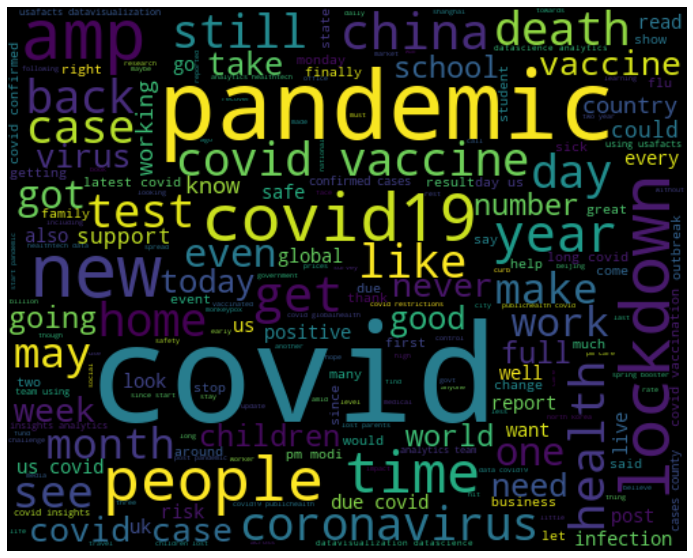

In [20]:
# Plot a word cloud

all_words = ' '.join( [data for data in df['tweet_text']])
word_cloud = WordCloud(width=500, height=400, random_state=21, max_font_size = 100,
                       stopwords=stopwords).generate(all_words)

plt.figure(figsize = (20,10))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## Refining your Twitter API search query

In [21]:
search_words = "campaign OR foodprices OR lowerfoodprices OR covid19 OR economy"

# Latitude, logitude and search radius(km) for Zambia and some surrounding regions
loc = "1.2921,36.8219,1000km"

# Search dates
date_since = "2022-05-21"
date_until = "2022-05-26"

# We also want to exclude retweets and replies as this may sway results
my_search = search_words + " -filter:retweets" + " -filter:replies"  

In [22]:
# Use the tweepy Cursor method to access tweets from a specified region and between certain dates
tweets = tw.Cursor(api.search,
                       q=my_search,
                       lang="en",
                       tweet_mode='extended',
                       geocode=loc,
                       since=date_since,
                       until=date_until).items(1000)

In [23]:
# Once again, this should take ~2 minutes to run if you are collecting 1000 tweets
tweet_info = [[tweet.id_str,tweet.created_at,tweet.user.location,tweet.full_text] for tweet in tweets]

# Put our data into a dataframe 
df_new = pd.DataFrame(data=tweet_info, columns=['tweet_id_str','date_time','location','tweet_text'])

# Have a quick look at the dataframe
df_new

,tweet_id_str,date_time,location,tweet_text
0,1529612798241959943,2022-05-25 23:58:04,Kenya,Water melon for Ksh18.00 @ kg in Bura tana. Dm...
1,1529612784828305408,2022-05-25 23:58:01,n/a,"true democracy is practised in china, people h..."
2,1529611298098618368,2022-05-25 23:52:06,Ethiopia,The Amhara regional state government has engag...
3,1529610794933305345,2022-05-25 23:50:06,Kenya,"pigs for Ksh6,000.00 @ piglet in Nakuru. high ..."
4,1529609511404818433,2022-05-25 23:45:00,Ethiopia,‘Amhara security forces launched a campaign to...
...,...,...,...,...
995,1529319732016463875,2022-05-25 04:33:32,Kenya,#EconomyFirst\n\nBottom Up is everything Kenya...
996,1529319293703360512,2022-05-25 04:31:47,Kenya,There is a lot that needs to be done in the co...
997,1529318951204835328,2022-05-25 04:30:25,"Nairobi, Kenya",Mlisema lazima mkue na mobilized crowds kwa ca...
998,1529318843000053761,2022-05-25 04:30:00,"Nairobi, Kenya",Didmus Barasa In Trouble For Allegedly Brandin...


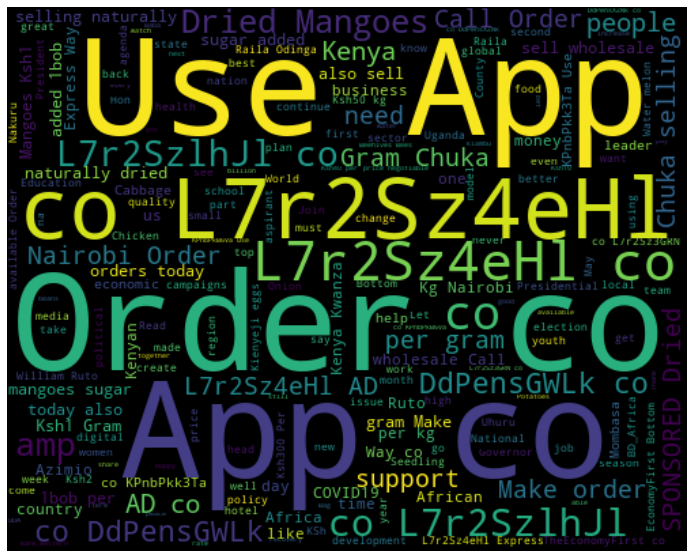

In [24]:
all_words = ' '.join( [data for data in df_new['tweet_text']])
word_cloud = WordCloud(width=500, height=400, random_state=21, max_font_size = 100,
                       stopwords=stopwords).generate(all_words)

plt.figure(figsize = (20,10))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [25]:
from google.colab import files
df_new .to_csv('df.csv')
files.download('df.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [26]:
plt.savefig('word_cloud.png')

<Figure size 432x288 with 0 Axes>